# Analysis

In [1]:
import os
import sys
from tqdm import tqdm
from collections import Counter
import numpy as np
import operator
import statistics

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.util import load_json
import matplotlib.pyplot as plt

In [2]:
train_contexts_path = '../data/processed/train_contexts.json'
train_answers_path = '../data/processed/train_answers.json'
val_contexts_path = '../data/processed/dev_contexts.json'
val_answers_path = '../data/processed/dev_answers.json'

In [3]:
train_contexts, train_answers = load_json(train_contexts_path), load_json(train_answers_path)
val_contexts, val_answers = load_json(val_contexts_path), load_json(val_answers_path)

## Context + Question Lengths

In [22]:
train_context_lengths, train_question_lengths = Counter(), Counter()
val_context_lengths, val_question_lengths = Counter(), Counter()

In [101]:
def bar(title, counter, fig_size=(60, 10), tick_font=10):
    fig = plt.figure(figsize=fig_size, dpi=180, facecolor='w', edgecolor='k')
    top = dict(sorted(counter.items(), key=operator.itemgetter(1), reverse=True)[0:400])

    plt.bar(range(len(top)), top.values(), align='center')
    plt.xticks(range(len(top)), sorted([int(key) for key in top.keys()]), fontsize=tick_font)
    plt.xlabel('Length', fontsize=15)
    plt.ylabel('Occurrence', fontsize=15)
    plt.title(title)

    plt.show()
    
def stats(counter):
    lengths = [int(key) for key in counter.keys()]
    min_length = min(lengths)
    max_length = max(lengths)
    median = statistics.median(lengths)
    mean = statistics.mean(lengths)
    return min_length, max_length, median, mean
    
def count(data, counter, token_key):
    for key, value in data.items():
        tokens = data[key][token_key]
        counter[str(len(tokens))] += 1
    return counter

In [84]:
train_context_lengths = count(train_contexts, train_context_lengths, 'context_tokens')
val_context_lengths = count(val_contexts, val_context_lengths, 'context_tokens')
train_question_lengths = count(train_answers, train_question_lengths, 'question_tokens')
val_question_lengths = count(val_answers, val_question_lengths, 'question_tokens')

## Contexts

### Train Contexts

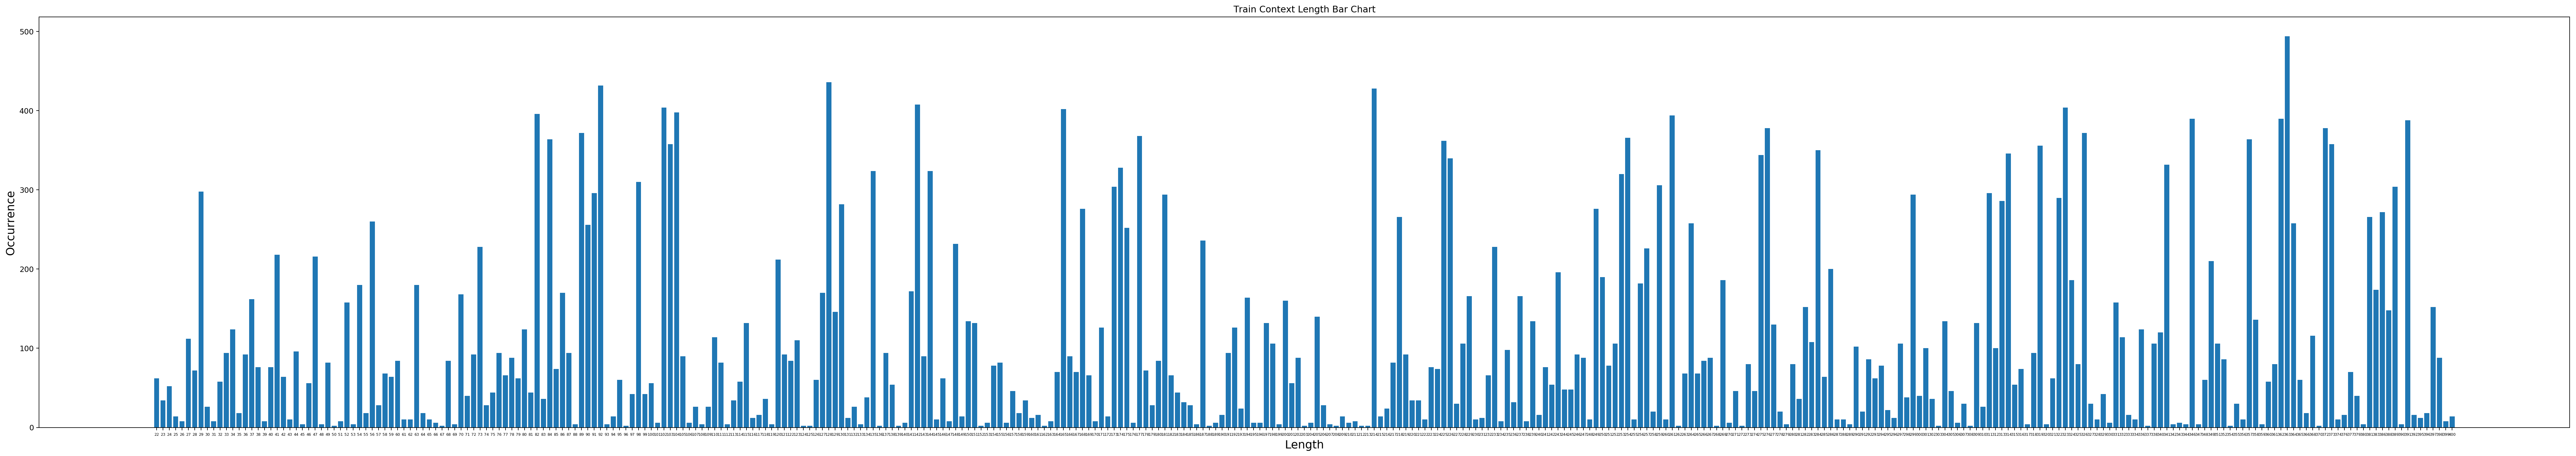

In [102]:
bar('Train Context Length Bar Chart', train_context_lengths, tick_font=5)

In [89]:
stats(train_context_lengths)

(22, 400, 203, 204.0275482093664)

### Val Contexts

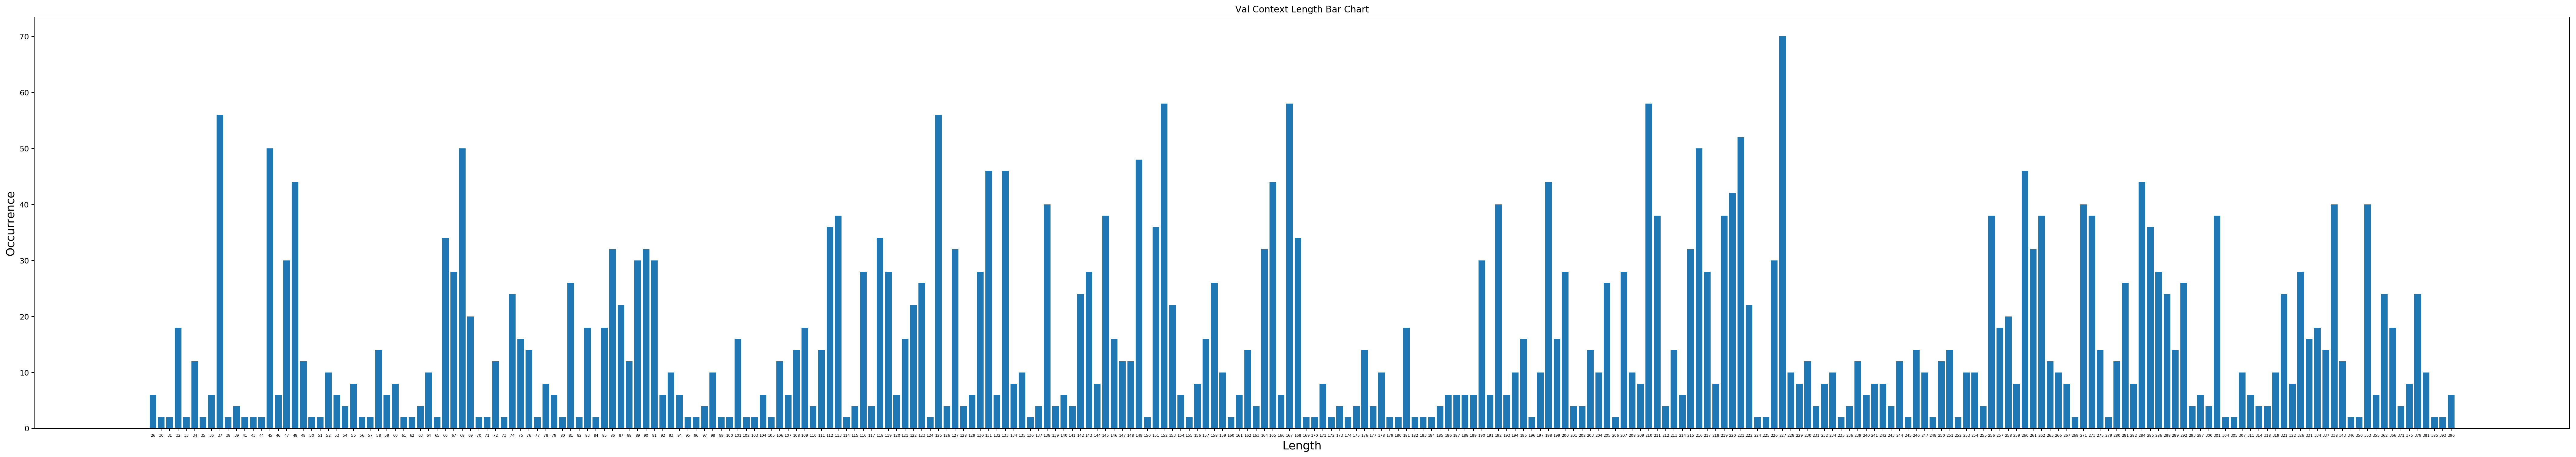

In [103]:
bar('Val Context Length Bar Chart', val_context_lengths, tick_font=5)

In [90]:
stats(val_context_lengths)

(26, 396, 168.5, 175.17028985507247)

## Questions

### Train Questions

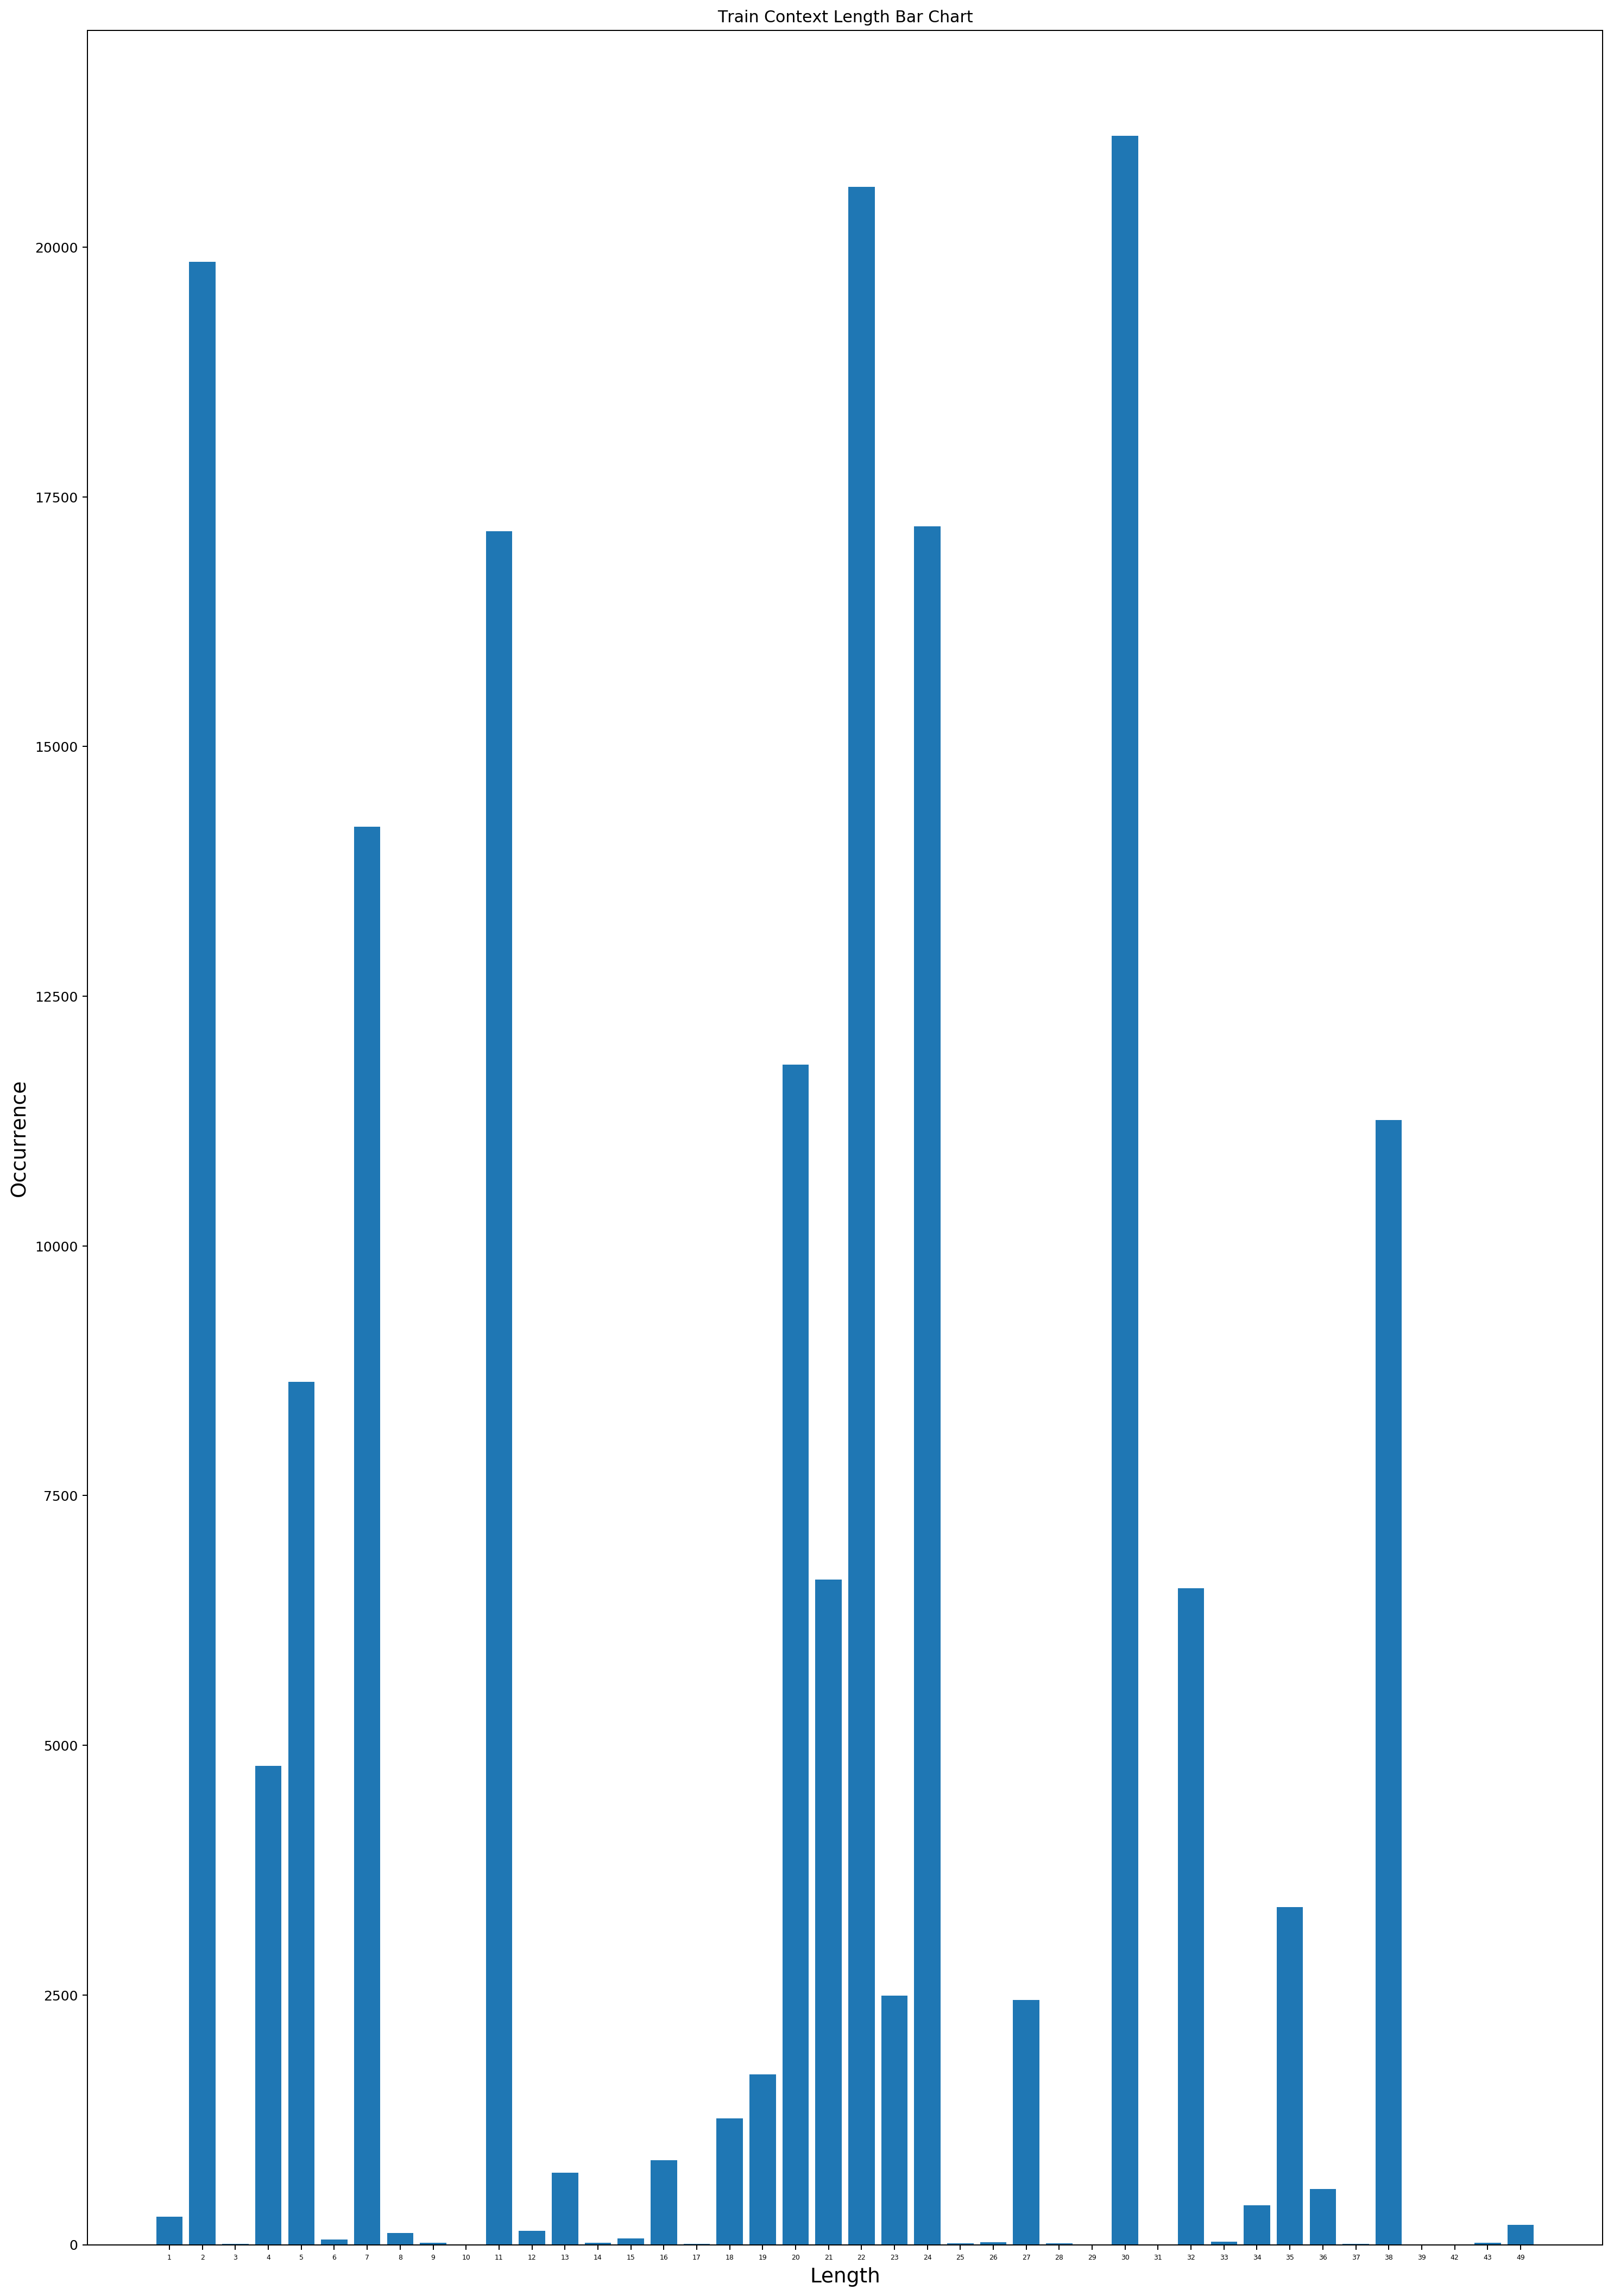

In [96]:
bar('Train Question Length', train_question_lengths, fig_size=(20, 30))

In [94]:
stats(train_question_lengths)

(1, 49, 21.5, 21.761904761904763)

### Val Questions

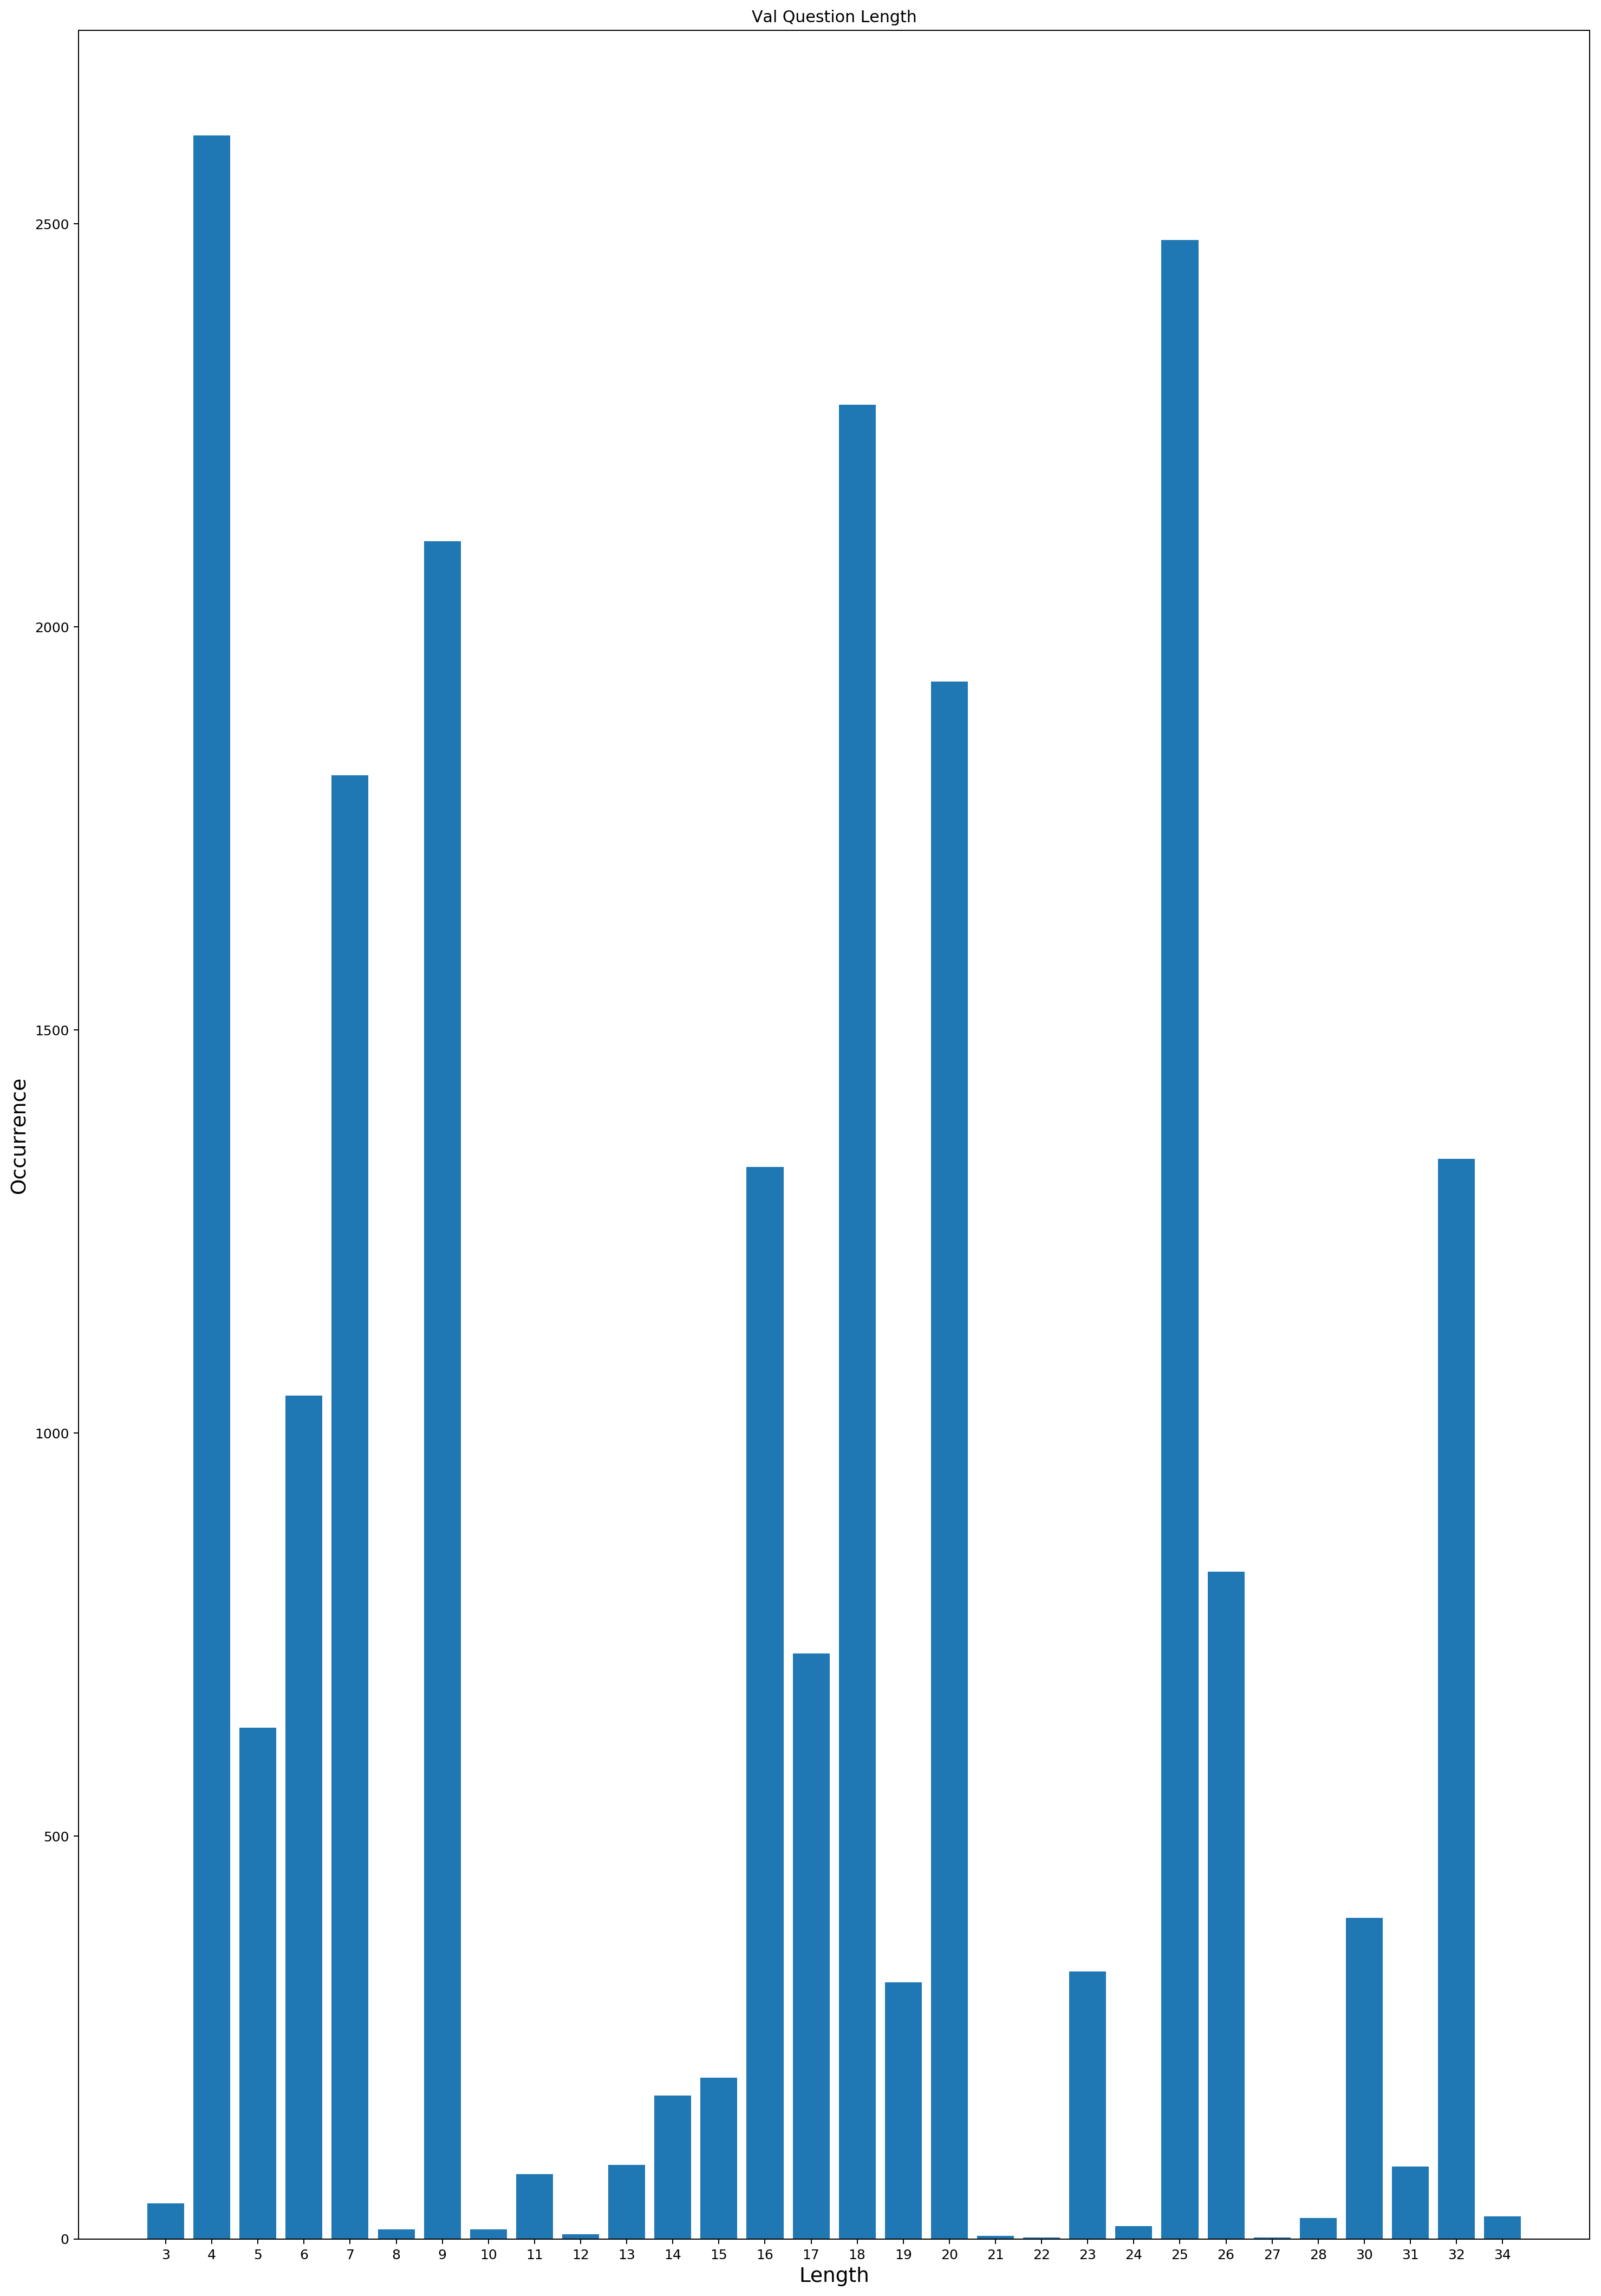

In [105]:
bar('Val Question Length', val_question_lengths, fig_size=(20, 30))

In [104]:
stats(val_question_lengths)

(3, 34, 17.5, 17.666666666666668)